In [63]:
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

In [64]:
def xgb_auc(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    scale_pos_weight = (Y_train == 0).sum() / (Y_train == 1).sum()

    # Modèle XGBoost
    model = xgb.XGBClassifier(
        use_label_encoder=False,
        objective='binary:logistic',
        eval_metric='auc',
        #eval_metric="logloss",
        #scale_pos_weight=scale_pos_weight,
        random_state=42,
        #max_depth = 1
    )
    model.fit(X_train, Y_train)

    Y_pred_proba = model.predict_proba(X_test)[:, 1]

    auc = roc_auc_score(Y_test, Y_pred_proba)
    
    Y_preds = model.predict(X_test)

    accuracy= accuracy_score(Y_test,Y_preds)

    print(f"AUC du modèle : {auc:.4f}")
    print(f'Accuracy :', accuracy*100)

    fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

    plt.figure(figsize=(8, 6))
    roc_display.plot()
    plt.plot([0, 1], [0, 1], color="gray", lw=1.5, linestyle="--")
    plt.title(f"Courbe ROC AUC = {auc:.4f}")
    plt.grid(True)
    plt.show()

In [65]:
belgium = pd.read_csv('/home/onyxia/work/Federated_Learning_Milliman/data/belgium_data.csv')
italian = pd.read_csv('/home/onyxia/work/Federated_Learning_Milliman/data/european_data.csv')
french = pd.read_csv('/home/onyxia/work/Federated_Learning_Milliman/data/french_data.csv')

In [66]:
belgium

,Exposure,Power,DriverAge,Fuel_type,Density,Sex,Sinistre
0,1.000000,77,50,0,13928,1,1
1,1.000000,66,64,0,13928,0,0
2,1.000000,70,60,1,13928,1,0
3,1.000000,57,77,0,13928,1,0
4,0.046575,70,28,0,13928,0,1
...,...,...,...,...,...,...,...
163207,1.000000,40,37,1,259,1,0
163208,1.000000,55,44,1,259,1,0
163209,1.000000,40,50,1,259,1,0
163210,1.000000,66,43,0,259,1,0


In [67]:
belgium["log_exposure"] = np.log(belgium["Exposure"])

X_be = belgium.drop(columns=["Exposure","Sinistre"])
Y_be = belgium['Sinistre']

italian["log_exposure"] = np.log(italian["Exposure"])

X_it = italian.drop(columns=["Exposure","Sinistre"])
Y_it = italian['Sinistre']

french["log_exposure"] = np.log(french["Exposure"])

X_fr = french.drop(columns=["Exposure","Sinistre"])
Y_fr = french['Sinistre']

# Belgium

In [68]:
X_train_be, X_test_be, Y_train_be, Y_test_be = train_test_split(X_be, Y_be, test_size=0.2, random_state=42)

In [69]:
scale_pos_weight = (Y_train_be == 0).sum() / (Y_train_be == 1).sum()

# Modèle XGBoost
model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    #scale_pos_weight=scale_pos_weight,
    random_state=42
)
model.fit(X_train_be, Y_train_be)

# Prédiction des probabilités
Y_pred_proba_be = model.predict_proba(X_test_be)[:, 1]

# AUC
auc_be = roc_auc_score(Y_test_be, Y_pred_proba_be)

/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:21:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [70]:
print(f"AUC du modèle : {auc_be:.4f}")

AUC du modèle : 0.5933


In [71]:
Y_preds_be = model.predict(X_test_be)

accuracy_be= accuracy_score(Y_test_be,Y_preds_be)
print('Accuracy of the model be is:', accuracy_be*100)

Accuracy of the model be is: 88.77554146371351


# Italian

In [72]:
X_train_it, X_test_it, Y_train_it, Y_test_it = train_test_split(X_it, Y_it, test_size=0.2, random_state=42)

In [73]:
scale_pos_weight = (Y_train_it == 0).sum() / (Y_train_it == 1).sum()

# Modèle XGBoost
model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    #scale_pos_weight=scale_pos_weight,
    random_state=42
)
model.fit(X_train_it, Y_train_it)

# Prédiction des probabilités
Y_pred_proba_it = model.predict_proba(X_test_it)[:, 1]

# AUC
auc_it = roc_auc_score(Y_test_it, Y_pred_proba_it)

/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:21:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [74]:
print(f"AUC du modèle be : {auc_it:.4f}")

AUC du modèle be : 0.6619


In [75]:
Y_preds_it = model.predict(X_test_it)

accuracy_it= accuracy_score(Y_test_it,Y_preds_it)
print('Accuracy of the model be is:', accuracy_it*100)

Accuracy of the model be is: 92.31522838361705


# ALL

/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:21:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AUC du modèle : 0.6619
Accuracy : 92.31522838361705


/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


<Figure size 800x600 with 0 Axes>

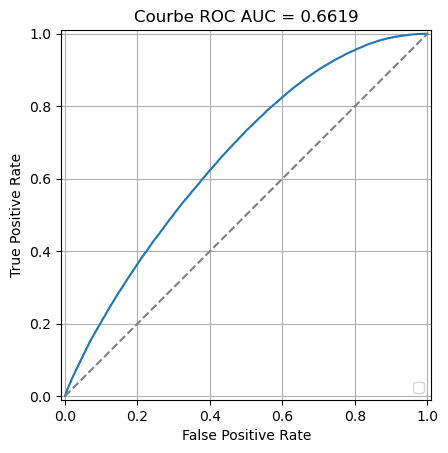

In [76]:
xgb_auc(X_it,Y_it)

/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:21:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AUC du modèle : 0.5933
Accuracy : 88.77554146371351


/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


<Figure size 800x600 with 0 Axes>

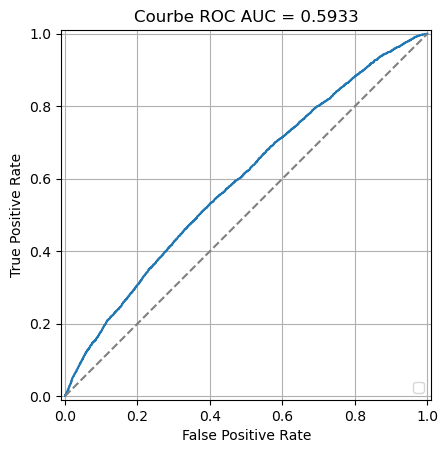

In [77]:
xgb_auc(X_be,Y_be)

/opt/conda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:21:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AUC du modèle : 0.6502
Accuracy : 95.47372810293396


/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


<Figure size 800x600 with 0 Axes>

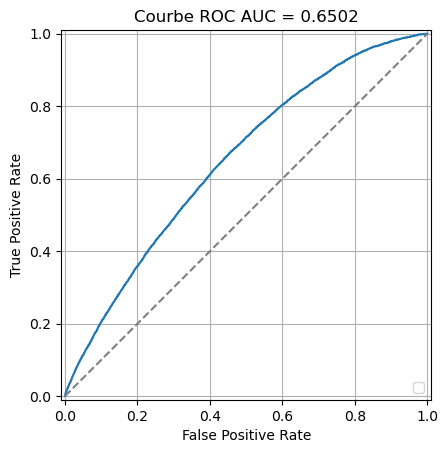

In [78]:
xgb_auc(X_fr,Y_fr)

# TEST

In [79]:

df = pd.read_csv("/home/onyxia/work/Federated_Learning_Milliman/data/european_data.csv")

#df["log_exposure"] = np.log(df["Exposure"])


features = ["Exposure","Power", "DriverAge", "Fuel_type", "Sex"]
X = df[features]
y = df["Sinistre"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

offset_train = np.log(X_train["Exposure"])
offset_test = np.log(X_test["Exposure"])

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

dtrain.set_float_info("base_margin", offset_train)
dtest.set_float_info("base_margin", offset_test)


scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

params = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "max_depth": 4,
    "scale_pos_weight": scale_pos_weight,
    "seed": 42
}

evallist = [(dtrain, "train"), (dtest, "eval")]
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=300,
    evals=evallist,
    early_stopping_rounds=20,
    verbose_eval=False
)

y_proba = model.predict(dtest)

auc = roc_auc_score(y_test, y_proba)
print(f"\n AUC du modèle : {auc:.4f}")



 AUC du modèle : 0.6520
